Load the data and perform EDA.

https://www.kaggle.com/pavansubhasht/ibm-hr-analytics-attrition-dataset

1. Evaluate missing values
2. Assess target class distribution
3. Assess information value of individual features (correlation analysis and pairlot).

5 pts.


In [5]:
from google.colab import files
uploaded = files.upload()
import io
import pandas as pd  # Import the pandas library and alias it as 'pd'

# Get the actual filename from the uploaded dictionary, handling potential duplicate uploads
filenames = list(uploaded.keys())  # Get all filenames in the uploaded dictionary
filename = filenames[0] # Assume only one file is uploaded

# Access the file using the correct, potentially modified filename
HR_data = pd.read_csv(io.BytesIO(uploaded[filename])) # Use the actual filename from the uploaded dictionary

Saving HR-Employee-Attrition.csv to HR-Employee-Attrition (4).csv


In [6]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv("HR-Employee-Attrition.csv")

# Display first few rows of the dataset
print(df.head())


   Age Attrition     BusinessTravel  DailyRate              Department  \
0   41       Yes      Travel_Rarely       1102                   Sales   
1   49        No  Travel_Frequently        279  Research & Development   
2   37       Yes      Travel_Rarely       1373  Research & Development   
3   33        No  Travel_Frequently       1392  Research & Development   
4   27        No      Travel_Rarely        591  Research & Development   

   DistanceFromHome  Education EducationField  EmployeeCount  EmployeeNumber  \
0                 1          2  Life Sciences              1               1   
1                 8          1  Life Sciences              1               2   
2                 2          2          Other              1               4   
3                 3          4  Life Sciences              1               5   
4                 2          1        Medical              1               7   

   ...  RelationshipSatisfaction StandardHours  StockOptionLevel  \
0  ...

In [7]:
# Check for missing values
missing_values = df.isnull().sum()
print("Missing Values in Each Column:\n", missing_values)


Missing Values in Each Column:
 Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInC

Attrition Distribution:
 Attrition
No     1233
Yes     237
Name: count, dtype: int64


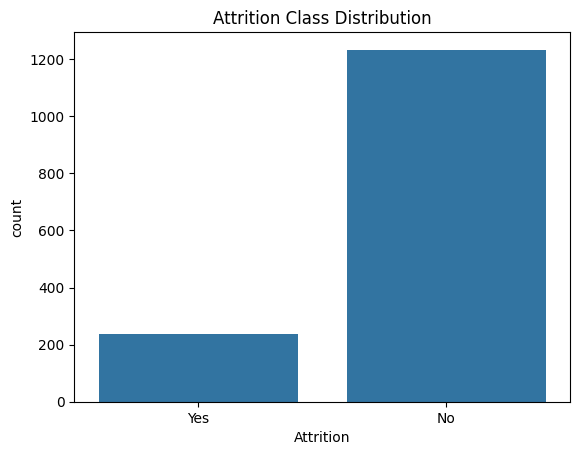

In [8]:
# Target class distribution
attrition_dist = df['Attrition'].value_counts()
print("Attrition Distribution:\n", attrition_dist)

# Plot the target class distribution
sns.countplot(x='Attrition', data=df)
plt.title('Attrition Class Distribution')
plt.show()


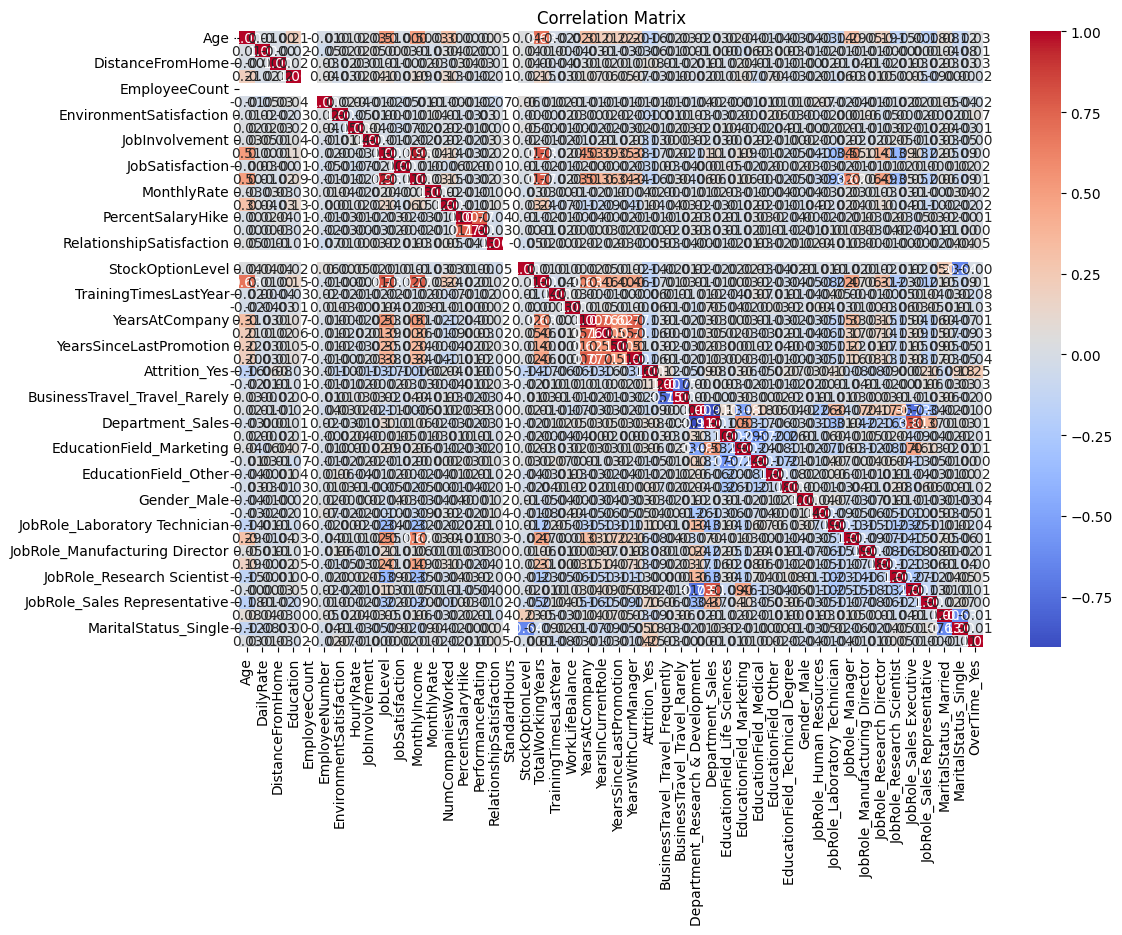

In [9]:
# Encode categorical variables for correlation
df_encoded = pd.get_dummies(df, drop_first=True)

# Correlation matrix
corr_matrix = df_encoded.corr()
plt.figure(figsize=(12,8))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


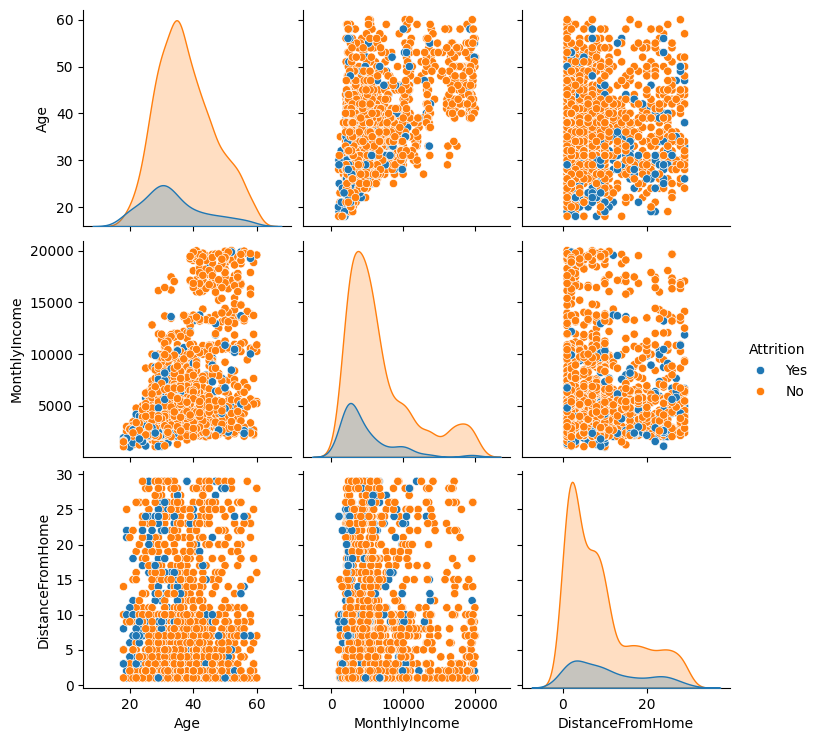

In [10]:
# Select important features for pairplot (for performance reasons, choose a subset)
important_features = ['Age', 'MonthlyIncome', 'DistanceFromHome', 'Attrition']

# Pairplot
sns.pairplot(df[important_features], hue='Attrition', diag_kind='kde')
plt.show()


4. Pre-process the dataset
5. Split the data into training/test datasets (70/30)

4 pts.

In [11]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Load dataset
df = pd.read_csv("HR-Employee-Attrition.csv")

# Pre-process the dataset

# 1. Handle missing values (if any)
# In this case, there might not be missing values, but if there were, you could use:
# df.fillna(method='ffill', inplace=True)

# 2. Encode categorical variables
# Use one-hot encoding for categorical variables
df_encoded = pd.get_dummies(df, drop_first=True)

# 3. Separate features (X) and target (y)
X = df_encoded.drop('Attrition_Yes', axis=1)  # Assuming 'Attrition_Yes' is the target after encoding
y = df_encoded['Attrition_Yes']

# 4. Normalize or scale numerical features (Optional but recommended)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 5. Split the data into training and test datasets (70/30)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.30, random_state=42, stratify=y)

# Print the shape of the resulting datasets
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)


X_train shape: (1029, 47)
X_test shape: (441, 47)
y_train shape: (1029,)
y_test shape: (441,)


6. Build a sequential neural network with the following parameters: 3 hidden dense layers - 100, 50, 25 nodes respectively, activation function = 'relu', dropout = 0.5 for each layer).
7. Use early stopping callback to prevent overfitting.

7 pts.

In [13]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Assuming data is already preprocessed (X_train, X_test, y_train, y_test)

# Create the neural network model
model = Sequential()

# Input layer + First hidden layer (100 nodes, relu activation, dropout)
model.add(Dense(100, activation='relu', input_shape=(X_train.shape[1],)))  # Input shape matches number of features
model.add(Dropout(0.5))

# Second hidden layer (50 nodes, relu activation, dropout)
model.add(Dense(50, activation='relu'))
model.add(Dropout(0.5))

# Third hidden layer (25 nodes, relu activation, dropout)
model.add(Dense(25, activation='relu'))
model.add(Dropout(0.5))

# Output layer (binary classification, 1 output node, sigmoid activation)
model.add(Dense(1, activation='sigmoid'))

# Compile the model (using binary crossentropy for binary classification and adam optimizer)
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Define early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Train the model
history = model.fit(X_train, y_train,
                    validation_data=(X_test, y_test),
                    epochs=100,
                    batch_size=32,
                    callbacks=[early_stopping],
                    verbose=1)

# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_acc:.4f}")


Epoch 1/100


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


33/33 ━━━━━━━━━━━━━━━━━━━━ 8s 95ms/step - accuracy: 0.5645 - loss: 0.7971 - val_accuracy: 0.8390 - val_loss: 0.4605
Epoch 2/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7686 - loss: 0.5660 - val_accuracy: 0.8390 - val_loss: 0.4533
Epoch 3/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8147 - loss: 0.5191 - val_accuracy: 0.8390 - val_loss: 0.4446
Epoch 4/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8135 - loss: 0.5070 - val_accuracy: 0.8390 - val_loss: 0.4404
Epoch 5/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8208 - loss: 0.4861 - val_accuracy: 0.8390 - val_loss: 0.4298
Epoch 6/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8164 - loss: 0.4642 - val_accuracy: 0.8390 - val_loss: 0.4239
Epoch 7/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8414 - loss: 0.4350 - val_accuracy: 0.8390 - val_loss: 0.4208
Epoch 8/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8473 - loss: 0.4181 - val_accuracy: 0.8390 - val_loss: 0.

8. Plot training and validation losses versus epochs.
9. Print out model confusion matrix.
10. Print out model classification report.
11. Print out model ROC AUC.

4 pts.

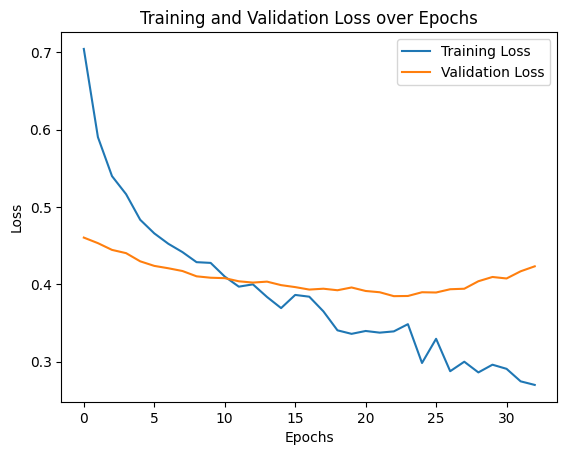

In [14]:
import matplotlib.pyplot as plt

# Plot training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step


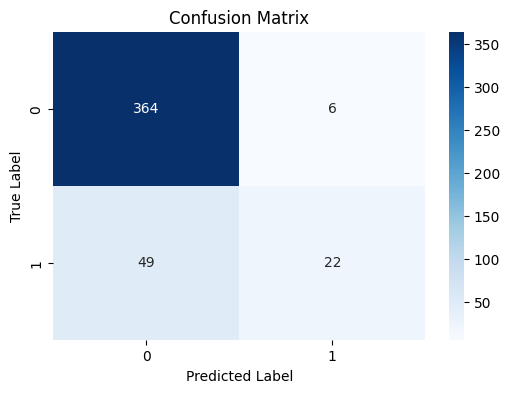

In [15]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Predict values for the test set
y_pred = (model.predict(X_test) > 0.5).astype("int32")

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix using seaborn heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


In [16]:
from sklearn.metrics import classification_report

# Classification report
report = classification_report(y_test, y_pred)
print("Classification Report:\n", report)


Classification Report:
               precision    recall  f1-score   support

       False       0.88      0.98      0.93       370
        True       0.79      0.31      0.44        71

    accuracy                           0.88       441
   macro avg       0.83      0.65      0.69       441
weighted avg       0.87      0.88      0.85       441



14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
ROC AUC: 0.7842
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


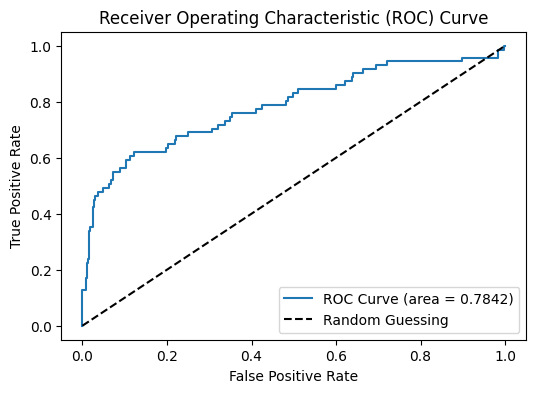

In [17]:
from sklearn.metrics import roc_auc_score, roc_curve

# ROC AUC Score
roc_auc = roc_auc_score(y_test, model.predict(X_test))
print(f"ROC AUC: {roc_auc:.4f}")

# Plot ROC curve
fpr, tpr, thresholds = roc_curve(y_test, model.predict(X_test))

plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, label=f'ROC Curve (area = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random Guessing')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()
